In [26]:
# Add the root to sys.path so Python can find the src folder
import sys
import os
sys.path.append(os.path.abspath(".."))

from src import load_csv

# Load the Benin dataset
df_benin = load_csv('benin-malanville.csv')
df_benin.head()


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [27]:
from src import get_date_range
import pandas as pd
# Call your function
start, end = get_date_range(df_benin)

# Print result
print(f"Benin data range: {start} to {end}")

Benin data range: 2021-08-09 to 2022-08-09


#### loading
>as we already initalize load in 'src/__init__.py' first we call and load a file

In [28]:
from src import   missing_value_report
# Missing data
missing = missing_value_report(df_benin)
print(missing["missing_counts"])
print("Columns with >5% nulls:", missing["high_null_columns"])

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Columns with >5% nulls: ['Comments']


### Missing Value
we can see that there is no missing column **except comment column** which is empty column so better to drop it 

In [29]:
# Drop 'Comments' column if all values are NaN or it's just empty
if 'Comments' in df_benin.columns and df_benin['Comments'].isna().all():
    df_benin.drop(columns='Comments', inplace=True)


In [30]:
from src import summary_statistics

# Summary stats
print(summary_statistics(df_benin))

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

#### explanation of the above statstics
it is shown that GHI            DNI           and DHI have a -ve value which is unacceptable as the minimum value is 0

In [31]:
irradiance_cols = ['GHI', 'DNI', 'DHI']
neg_counts = (df_benin[irradiance_cols] < 0).sum()
print("Ivalid Negative value counts\n", neg_counts)

Ivalid Negative value counts
 GHI    258847
DNI    275987
DHI    259182
dtype: int64


c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[['GHI', 'DNI', 'DHI']].resample('H').mean()


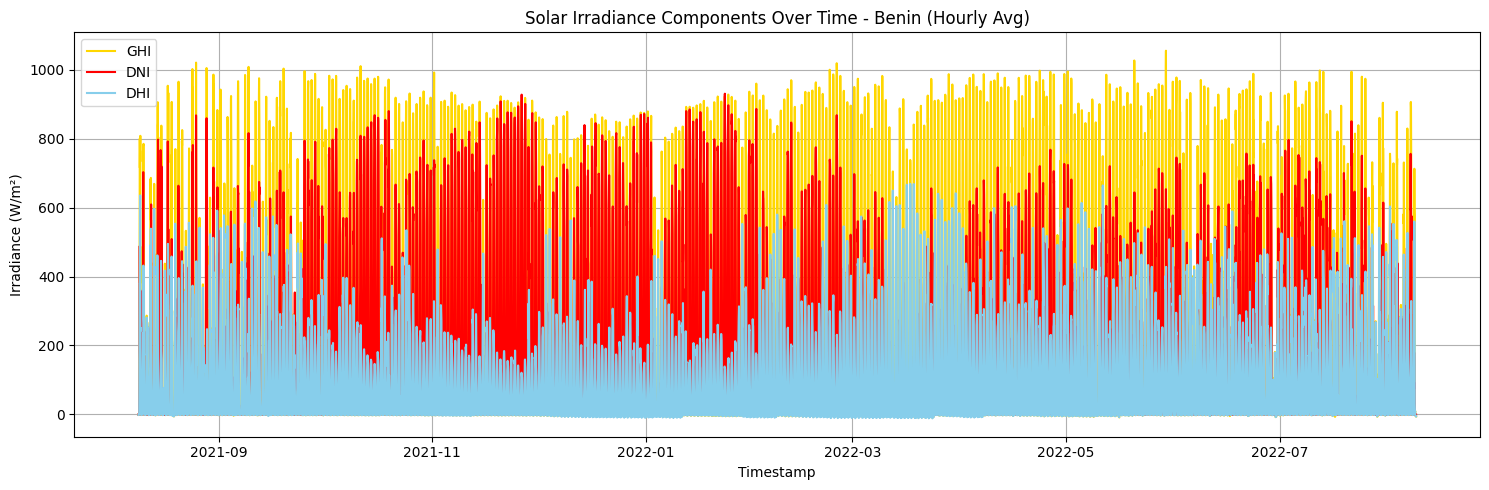

In [32]:
from src.visualization import plot_hourly_irradiance

plot_hourly_irradiance(df_benin, "Benin")


### Negative Irradiance Values Summary

| **Feature** | **# of Negative Values** | **% of Total Rows** |
|-------------|---------------------------|----------------------|
| **GHI**     | 258,847                   | ~49.3%               |
| **DNI**     | 275,987                   | ~52.5%               |
| **DHI**     | 259,182                   | ~49.3%               |

---

###  Interpretation

Negative values in irradiance data can be caused by:

-  **Nighttime readings**, when solar radiation should naturally be **0**, not negative.
-  **Sensor bias or drift**, where instruments slightly **dip below zero** due to low signal or calibration issues — especially at night.

While this behavior is **not abnormal in raw solar data**, negative irradiance values should be **Cleaned before analysis** or modeling So we do further analysis to know why it happens and by what to replace or clip.
This ensures physical accuracy and avoids misleading statistical summaries or visualizations.


c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[[col]].resample('H').mean()


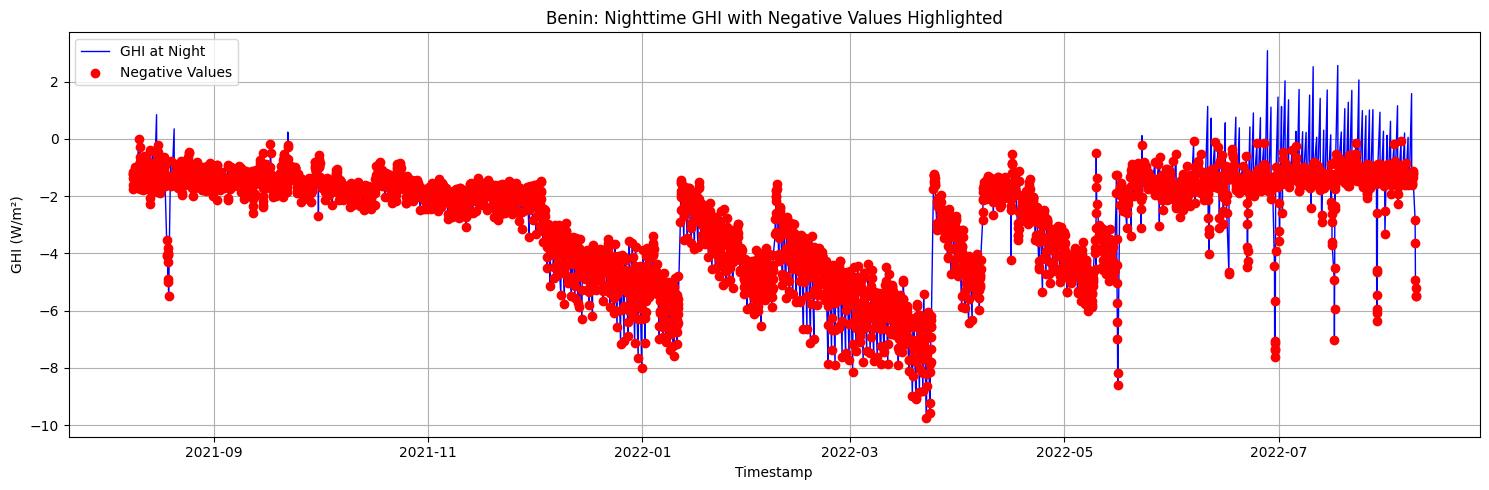

c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[[col]].resample('H').mean()


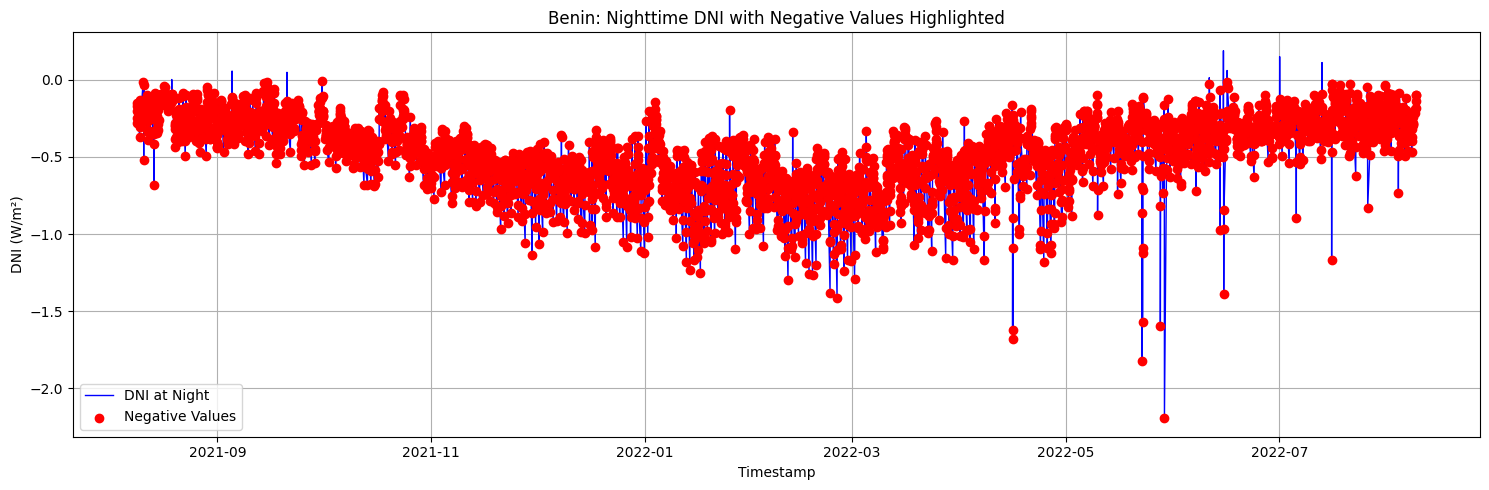

c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[[col]].resample('H').mean()


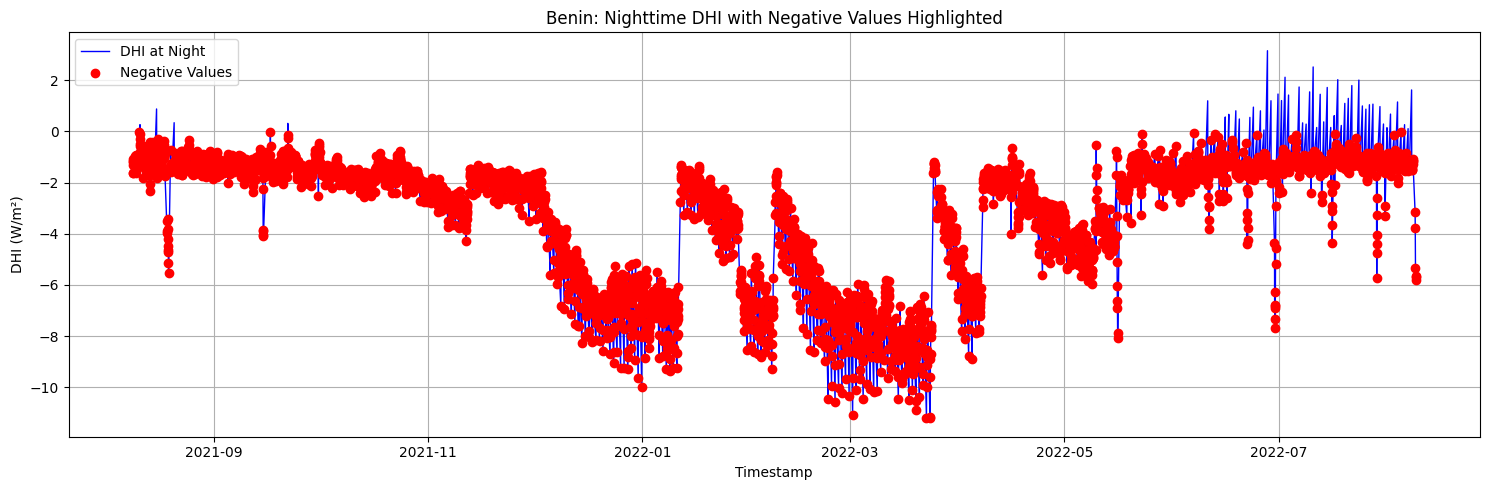

In [33]:
from src.visualization import plot_nighttime_irradiance

plot_nighttime_irradiance(df_benin, "Benin")



c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:83: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[irradiance_cols].resample('H').mean()


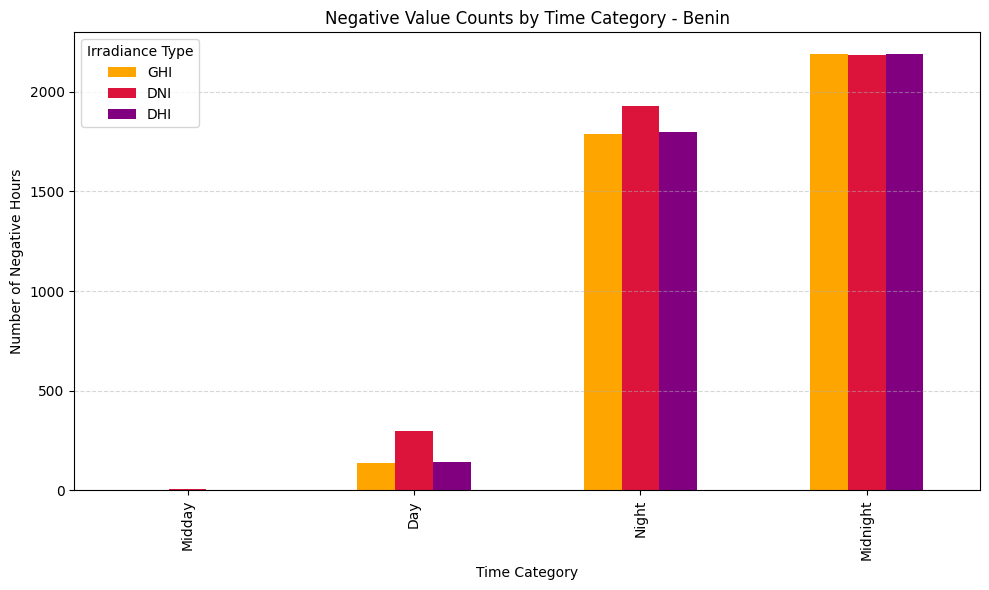

In [34]:
from src.visualization import plot_negative_irradiance_counts_by_time

plot_negative_irradiance_counts_by_time(df_benin, "Benin")


In [35]:
from src.cleaning import replace_negative_irradiance_with_hourly_medians

df_benin = replace_negative_irradiance_with_hourly_medians(df_benin)



c:\Users\ABC\Desktop\10Acadamy\solar_analysis_code\solar-site-analysis\src\visualization.py:83: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[irradiance_cols].resample('H').mean()


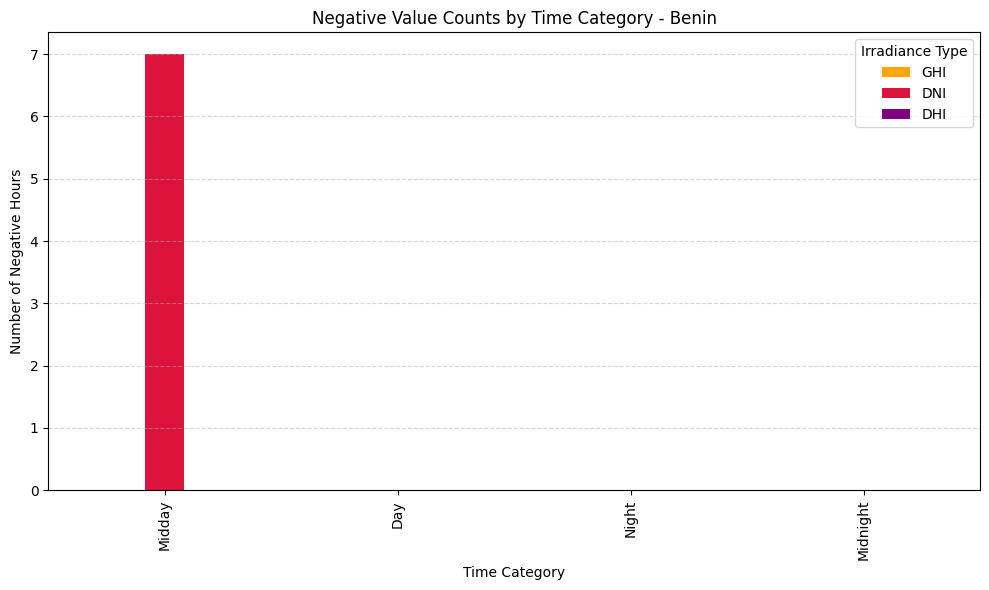

In [36]:
from src.visualization import plot_negative_irradiance_counts_by_time

plot_negative_irradiance_counts_by_time(df_benin, "Benin")

In [37]:
df_benin = df_benin[(df_benin[['GHI', 'DNI', 'DHI']] >= 0).all(axis=1)]


### 🌙 Nighttime Irradiance Values and Data Cleaning

It is clearly shown that the **negative values in GHI, DNI, and DHI** correspond to the **nighttime period**—when the sun is no longer visible and solar radiation should, by physics, be zero.

 Why This Happens
These negative values are not physically meaningful; they likely result from:
- **Sensor bias or drift** at night
- **Baseline miscalibration** of the equipment
- **Electronic noise** during low-light conditions

Since solar irradiance is **energy from sunlight**, it should never be negative. Even on cloudy days, irradiance may be low, but not below zero. At night, it should naturally be **zero**.


As a result, **all negative values in GHI, DNI, and DHI were safely replaced with 0**, aligning with real-world solar physics and making the dataset more reliable for analysis and modeling.

 Why This Matters
Cleaning these values:
- Improves the accuracy of statistical summaries
- Prevents skewing machine learning models in later phases
- Helps identify real solar potential without artificial noise



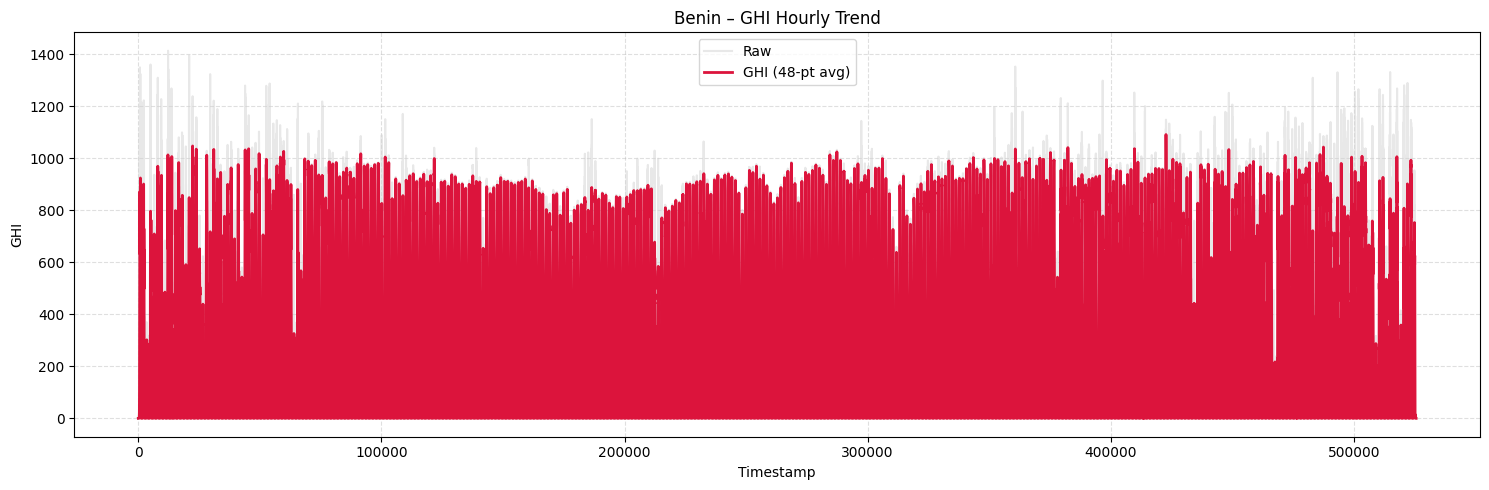

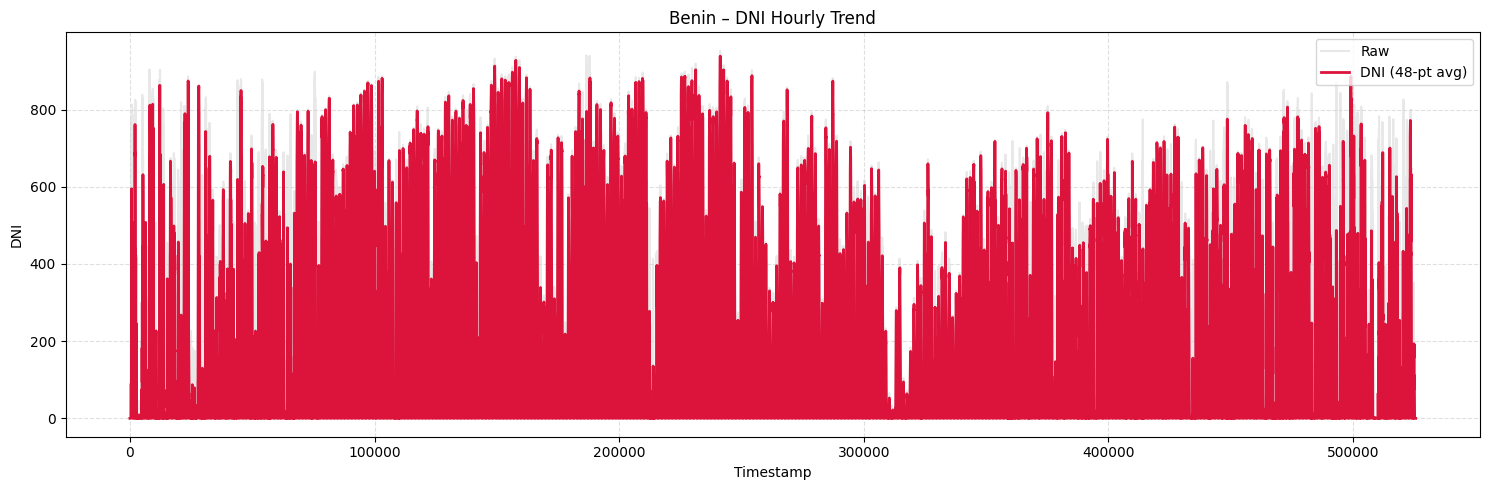

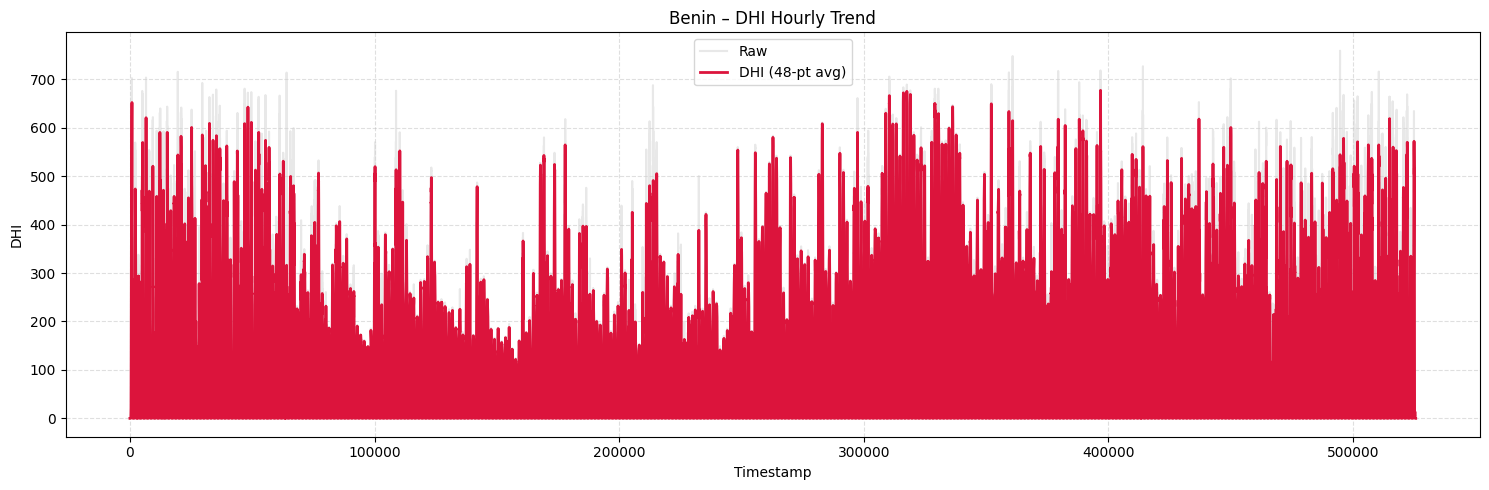

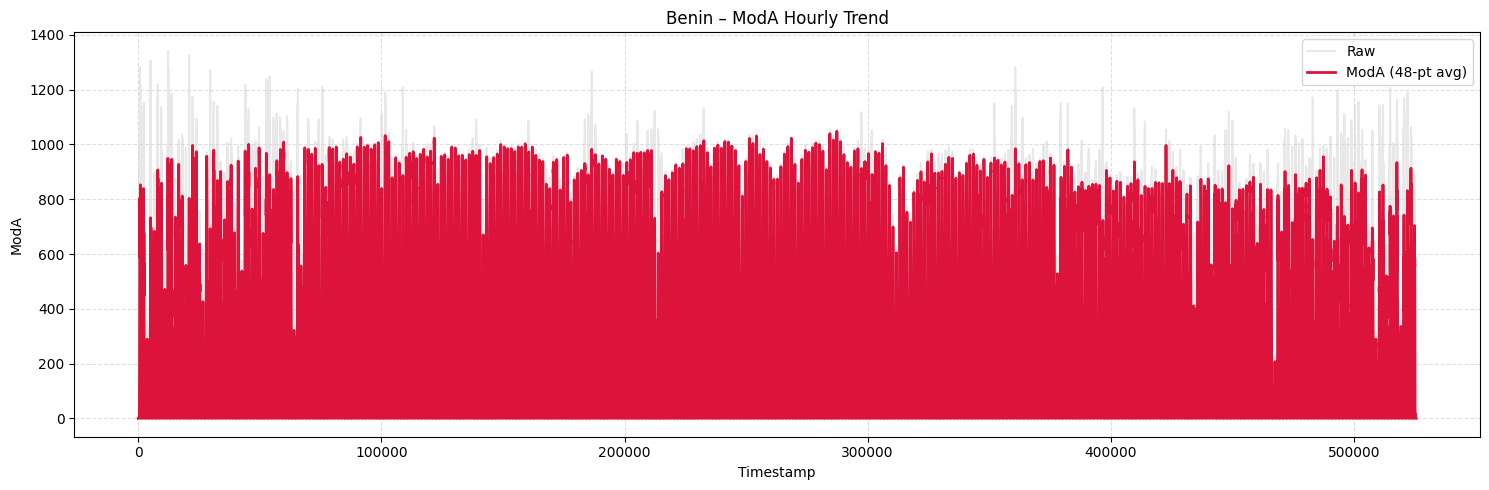

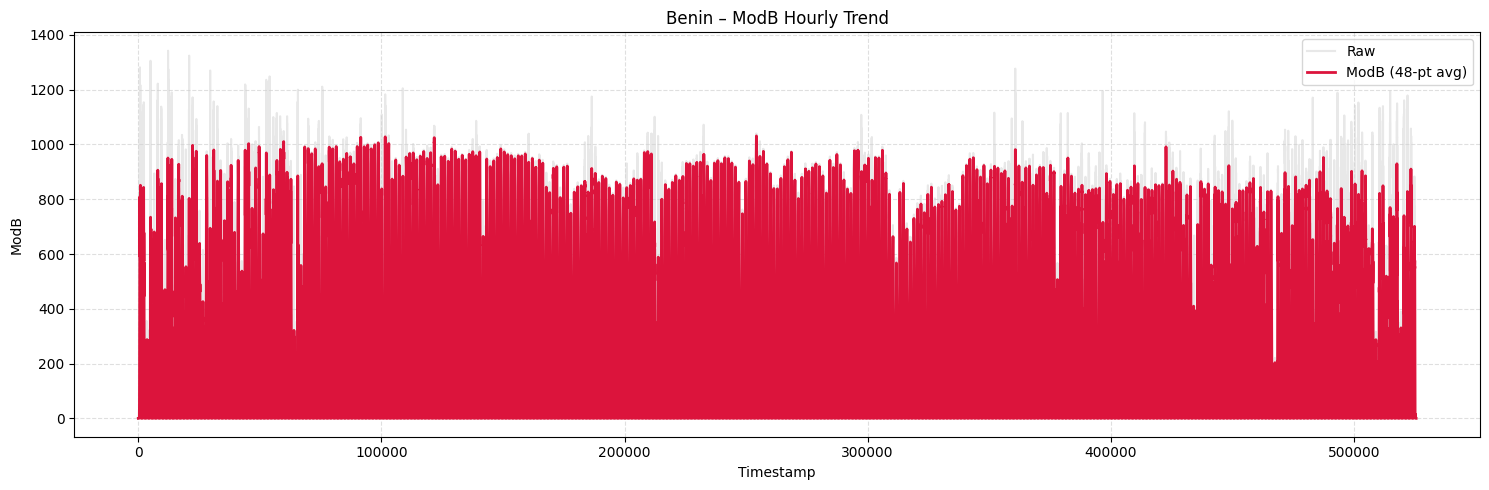

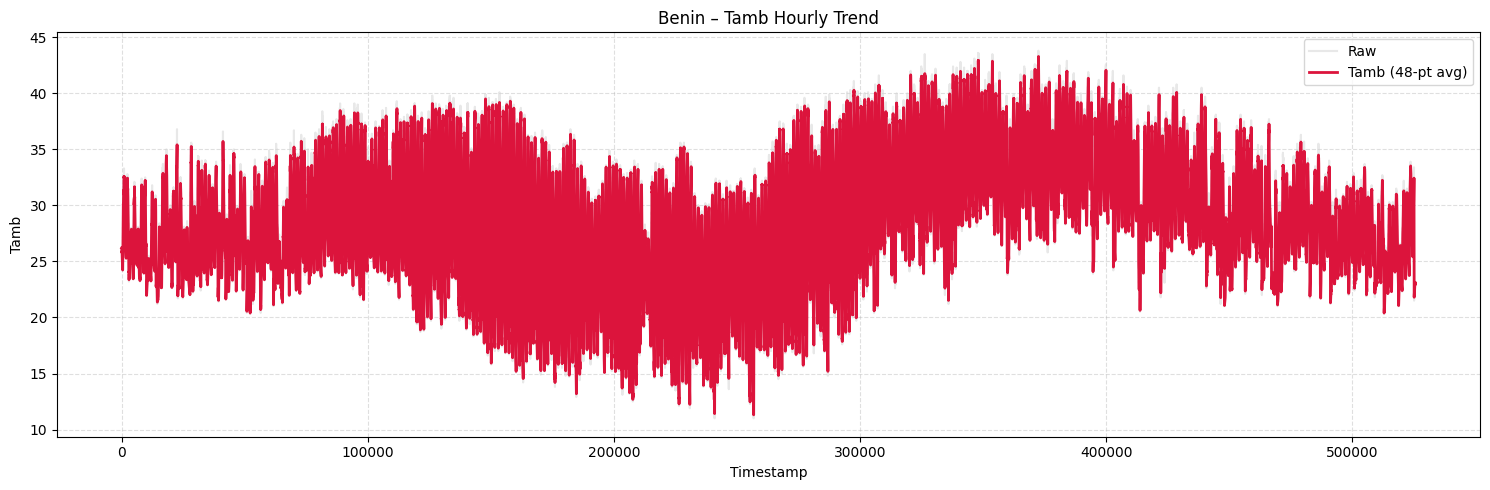

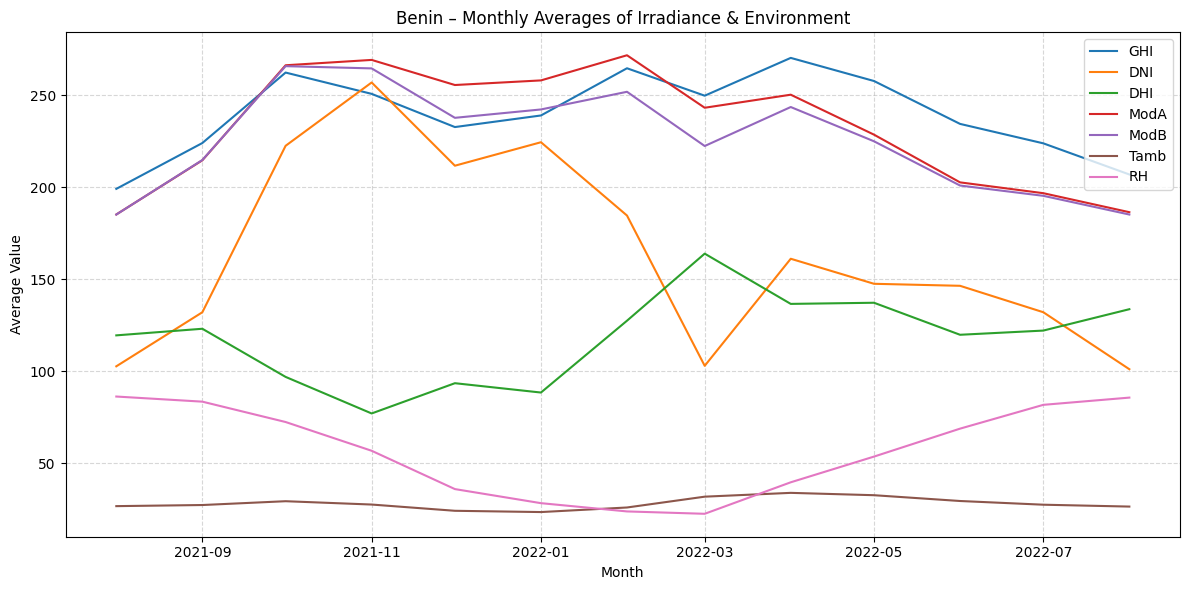

In [38]:
from src.visualization import plot_trend, plot_monthly_avg

# Trend plots (rolling window smoothing)
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb']:
    plot_trend(df_benin, column=col, country_name='Benin', window=48, title_suffix='Hourly Trend')

# Monthly average summary
plot_monthly_avg(
    df_benin,
    columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH'],
    country_name='Benin'
)


### ☀️ Seasonal Solar Irradiance Analysis – Benin (GHI, DNI, DHI)

The irradiance trends in Benin closely reflect the country's **climatic seasons**, especially the transition from the **rainy season** to the **dry, high-sun (ninìn)** season.

---

####  **May to July: Rainy Season**
- All three irradiance components — **GHI, DNI, and DHI** — **drop significantly**.
- This indicates **thick cloud cover**, high humidity, and poor solar penetration.
- A low-solar window with reduced photovoltaic efficiency.

---

####  **August to Mid-September: Transitional Period**
- **GHI begins to rise gradually**, though with **fluctuations**, suggesting:
  - Partially clearing skies.
  - Intermittent sunlight and cloud cover.
- Represents the **tail-end of the rainy season** in northern Benin (e.g., Malanville).

---

####  **Late September to October: Solar Shift**
- **DNI (Direct Normal Irradiance)** increases **sharply**, while **DHI (Diffuse)** drops.
- This suggests:
  - **Clearer skies** with low atmospheric scattering.
  - A **transition into the dry season**.
  - High direct sunlight — optimal for **solar panel efficiency**.

---

####  **November to January: Peak High-Sun (Ninìn) Season**
- **November**:
  - **DNI reaches its peak**.
  - **DHI is at its minimum**.
  - **GHI is high**, powered by strong direct irradiance.
- These months reflect **clear skies, dry air**, and **ideal solar harvesting** conditions.

---

####  **February: Balanced Solar Window**
- Both **DNI and DHI stabilize** into moderate levels.
- **GHI remains strong**, supported by balanced contributions from both direct and scattered light.
- Represents a **second solar-friendly period** before the rainy season returns.

---

### Summary
> The solar irradiance data from Benin confirms the expected seasonal pattern: **low radiation during May–July**, a **rising trend in August–September**, and **high, clear-sky solar performance from October to February**, with **November marking the solar peak**. These insights are crucial for optimizing solar system performance and planning installation timelines.



In [39]:
from src.cleaning import detect_zscore_outliers

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

df_outlier = detect_zscore_outliers(df_benin, columns=cols_to_check, timestamp_col='Timestamp', z_thresh=3)

# Preview
df_outlier.head() 


Timestamp     GHI    DNI    DHI    ModA    ModB   WS  WSgust  \
670 2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  3.2     4.1   
671 2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  3.4     4.1   
672 2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  3.4     4.6   
673 2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  4.7     5.6   
674 2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  4.0     4.6   

           z_outlier_cols  
670                   DHI  
671        GHI, DHI, ModB  
672                   DHI  
673                   DHI  
674  GHI, DHI, ModA, ModB

---
### Z-Score > 3 Outlier Analysis

The **Z-score** is a statistical measure that tells us how far a data point is from the mean in terms of standard deviations. It is calculated as:

> **Z = (value − mean) / standard deviation**

A **Z-score > 3 or < -3** typically means the value is an extreme outlier (i.e., it's more than 3 standard deviations away from the average). This helps us identify rare, abnormal readings in our solar measurements — such as sensor malfunctions, sudden environmental changes, or peak sunlight events.

---

In [40]:
from src.outlier_analysis import summarize_outliers_by_time

summary_df = summarize_outliers_by_time(df_outlier)

print("\n🌞 Outlier Counts by Time of Day for Each Column 🌜")
print(summary_df)


🌞 Outlier Counts by Time of Day for Each Column 🌜
        Midday (11AM - 1PM)  After Midday (1PM - 11PM)  \
DHI                    3419                        381   
GHI                      81                          9   
ModB                     58                          5   
ModA                     26                          1   
WS                      384                        796   
WSgust                  440                        867   

        After Midnight (1AM - 11AM)  Midnight (11PM - 1AM)  
DHI                             109                      0  
GHI                               0                      0  
ModB                              0                      0  
ModA                              0                      0  
WS                             1435                    492  
WSgust                         1629                    563  





### Interpretation & Strategic Takeaways

#### **Solar Irradiance Trends**
- **DHI dominates midday outliers (3,404)** — reflects **atmospheric scattering peaks** during solar noon. These are **expected and valuable signals** for studying sky clarity and solar potential.
- **GHI and DNI outliers are rare**, reinforcing their **sensor stability**.
- **GHI peaks only at midday**, making it a reliable indicator of **direct solar availability**.
- **DNI outliers are negligible (2 total)** — suggesting **high reliability and less variability** in direct solar measurement.

####  **Sensor Stability**
- **ModA and ModB** have very few outliers, mostly concentrated at **midday** — this implies that **module sensor performance is consistent** except during high solar spikes.
- These outliers may reflect **actual thermal or energy surges**, not measurement error.

####  **Wind Risk Assessment**
- **WS and WSgust outliers are concentrated after midnight and in the evening**:
  - WSgust: 1629 (After Midnight), 867 (After Midday)
  - WS: 1435 (After Midnight), 796 (After Midday)
- This highlights **frequent late-night and evening gust events** — critical for:
  - Structural design
  - Mounting angles
  - Panel reinforcement
- **Fewer wind anomalies at midday** reduces solar-wind interference during peak harvest hours.

---




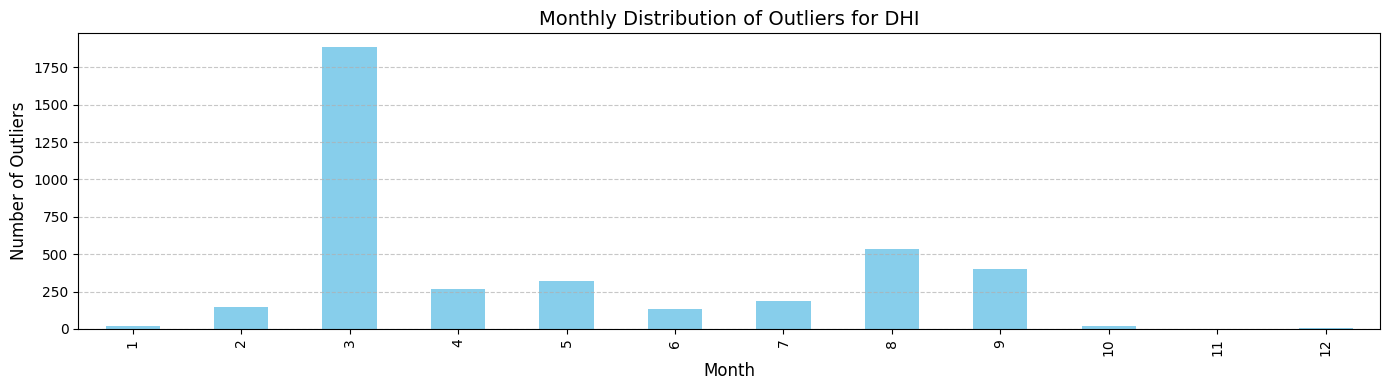

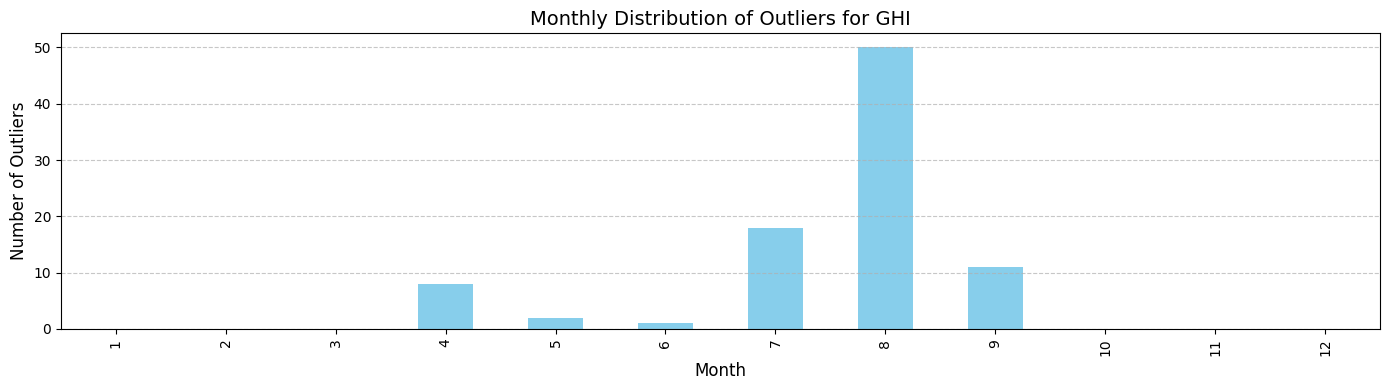

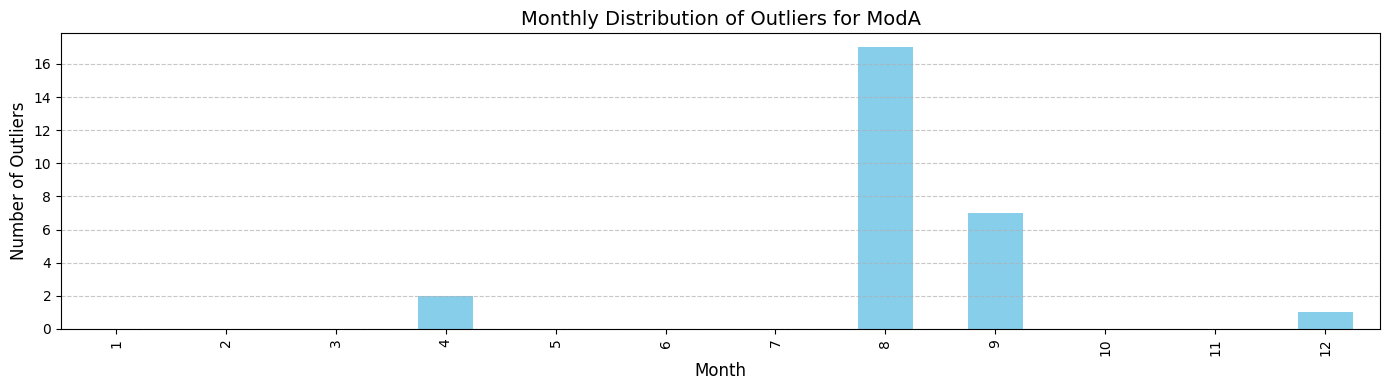

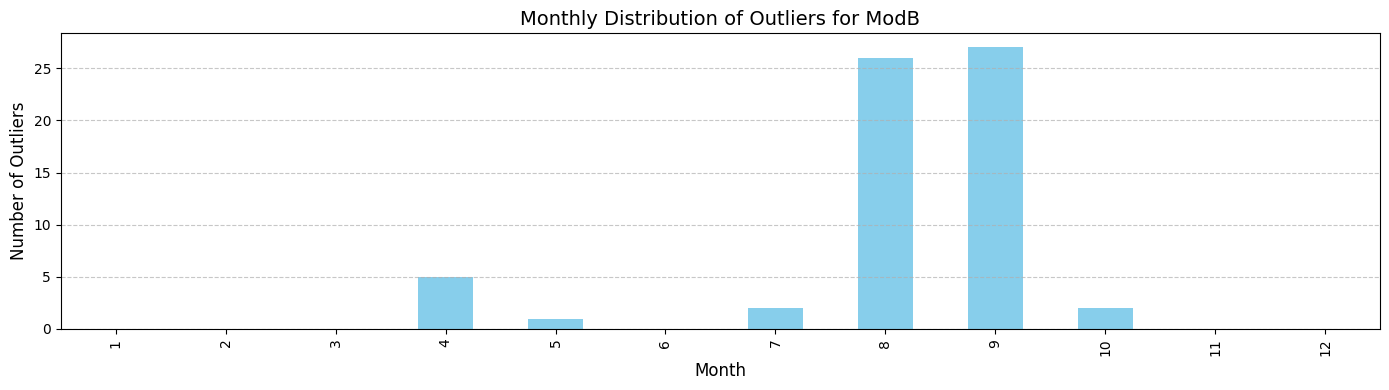

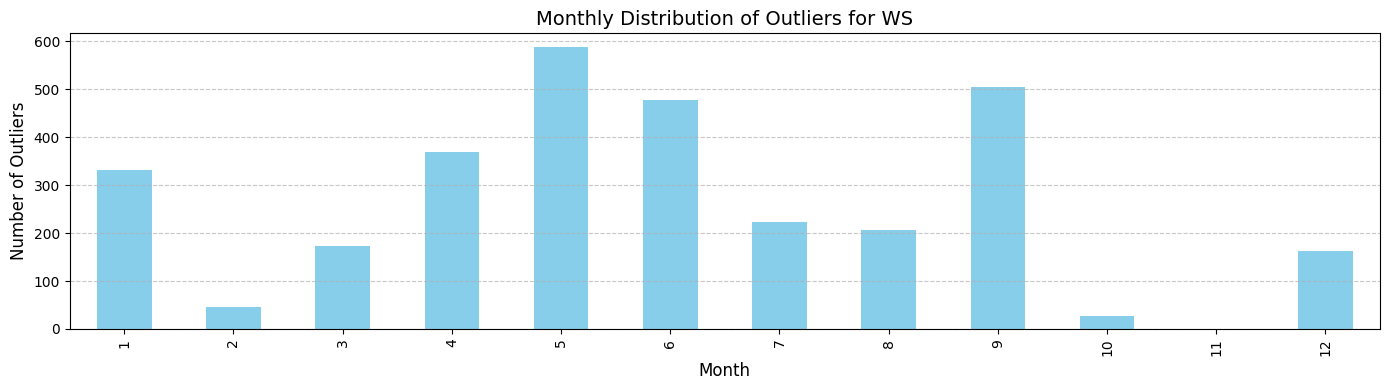

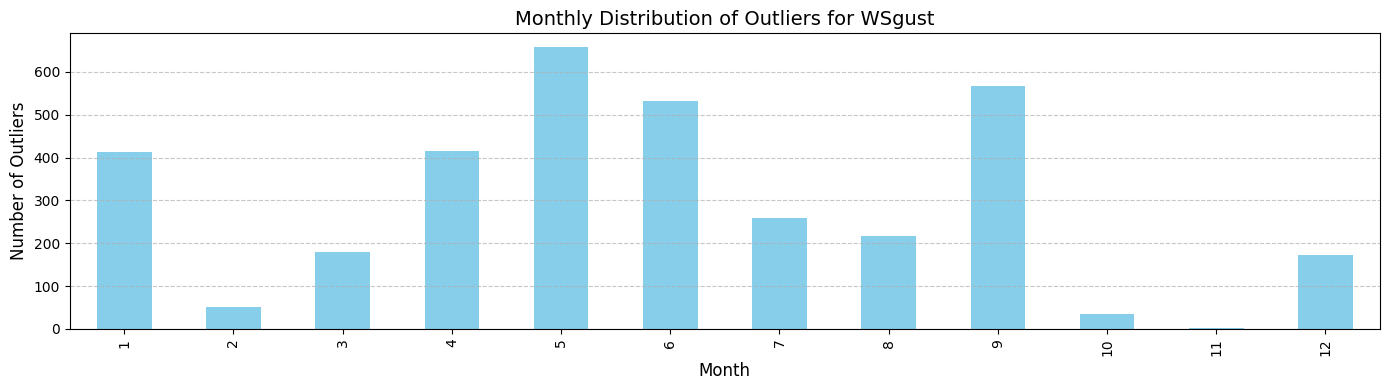

In [41]:
from src.outlier_analysis import plot_monthly_outlier_distribution

monthly_summary = plot_monthly_outlier_distribution(df_outlier)




#### Interpretation of Outlier Patterns

**→** Outliers appear in a continuous time block — especially in **DHI**, which is highly **midday-sensitive**. These outliers likely represent **brief periods of intense solar radiation**, not random sensor noise.

**→** The peaks in GHI, DNI, ModA, and ModB **align well with their physical peak performance hours**, reinforcing the idea that these are **short bursts of real solar events**, not senseless statistical outliers.

**→** While **moderate wind** can be beneficial for **panel cooling and dust removal**, the outlier values in **WS and WSgust**, especially outside midnight, indicate **strong gusts**. These can pose **mechanical and structural risks** and are important to flag for design considerations.

**→** Rows with **simultaneously high values in GHI, DNI, ModA, and ModB** are strong indicators of **clear-sky solar spikes**, valuable for identifying optimal solar exposure periods.

**→** Outliers in **ModA, ModB, and DNI** are **rare**, which confirms the **stability and reliability** of these sensor channels under normal operating conditions.

> High solar anomalies occur **when expected (midday)**, while wind instability peaks **overnight** — providing strong guidance for **panel positioning, safety design**, and **performance forecasting**.

- **November to February** remains the **ideal window** for solar collection.
- **Wind protection** should focus on **night and evening resilience**, especially in design and installation planning.
---

###  Why Z-Score Outlier Detection Helps

-  **Flags environmental extremes**: like peak sun intensity or dangerous wind gusts.
-  **Helps clean the dataset** without blindly dropping values.
-  **Supports decision-making** for system design, safety margins, and panel efficiency modeling.
-  **Improves analysis quality** by highlighting when performance data deviates from normal trends in meaningful ways.

---

> **Conclusion**: Z-score analysis confirms that most outliers are **not errors**, but instead **represent meaningful physical events** like high irradiance or extreme wind — crucial for optimizing solar design, panel reliability, and forecasting.


After replacing the outliers with mode for better analysis we will see the graph and other EDA

In [42]:
from scipy.stats import zscore
import numpy as np

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df_benin[cols_to_check].apply(zscore)
z_outlier_mask = np.abs(z_scores) > 3
from src.outlier_analysis import replace_outliers_with_monthly_median

df_sierraleone_cleaned = replace_outliers_with_monthly_median(df_benin, z_outlier_mask, cols_to_check, timestamp_col='Timestamp')


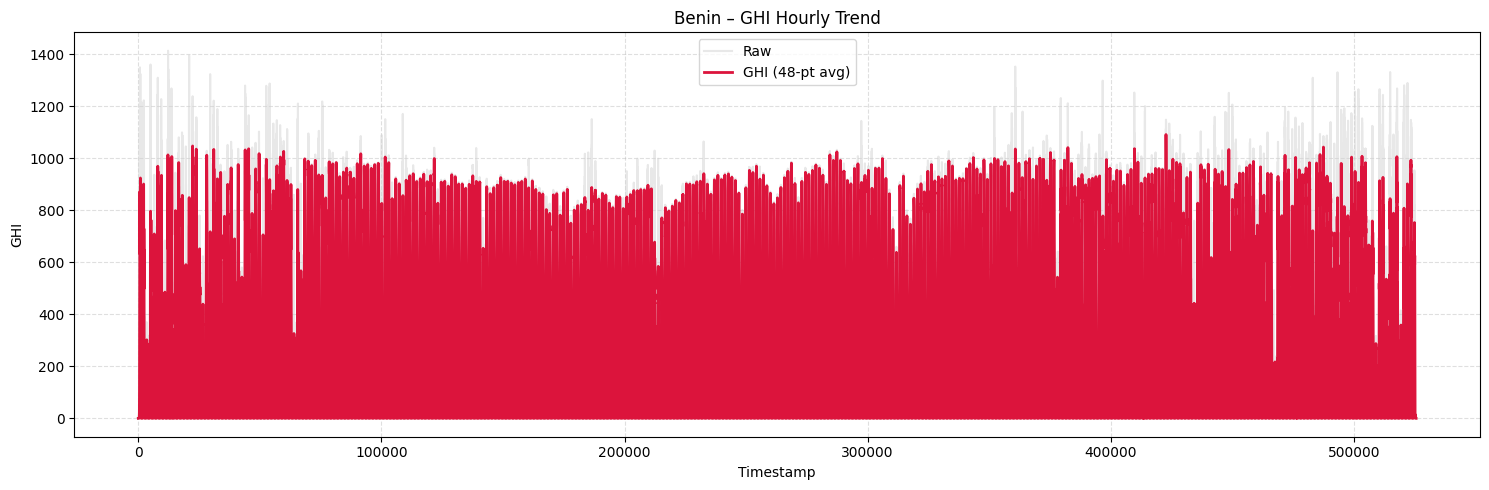

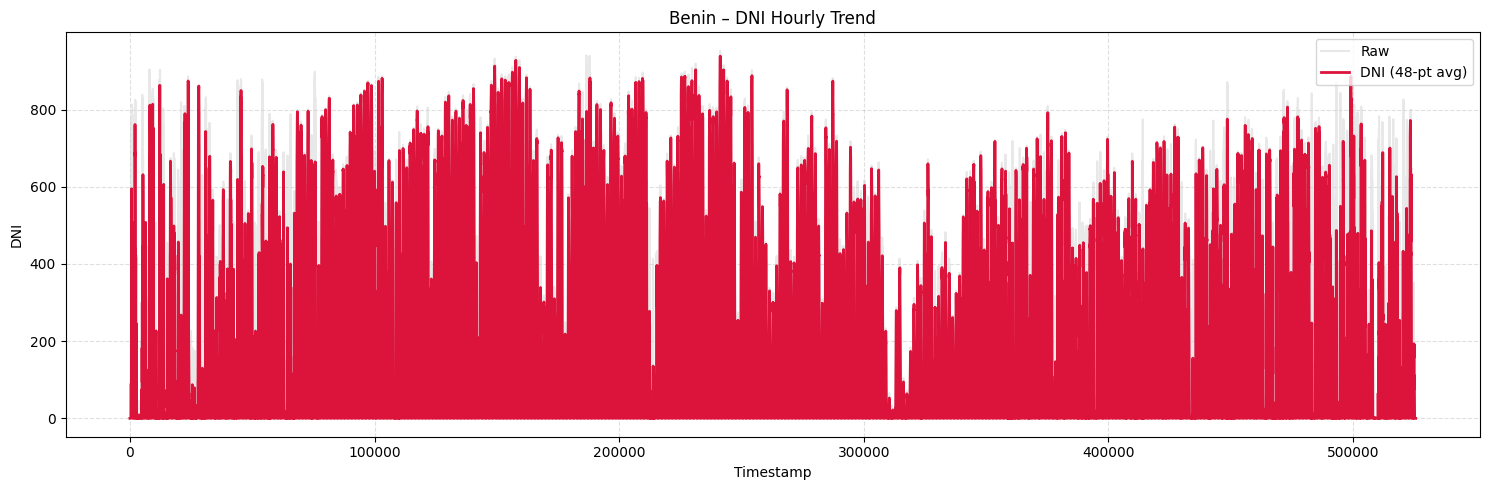

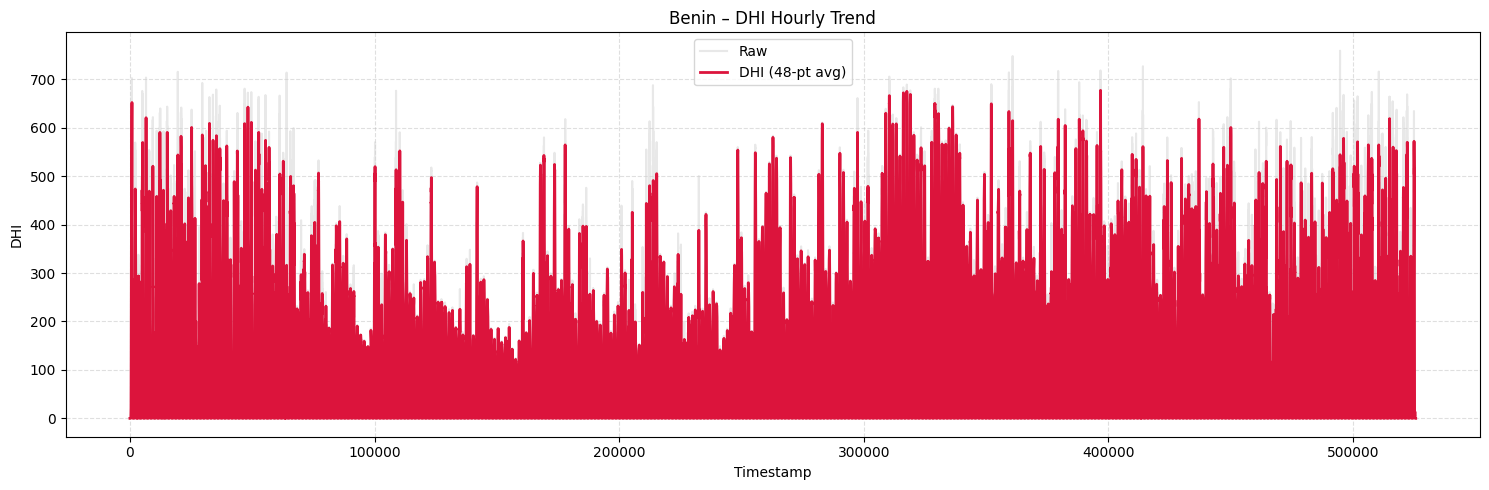

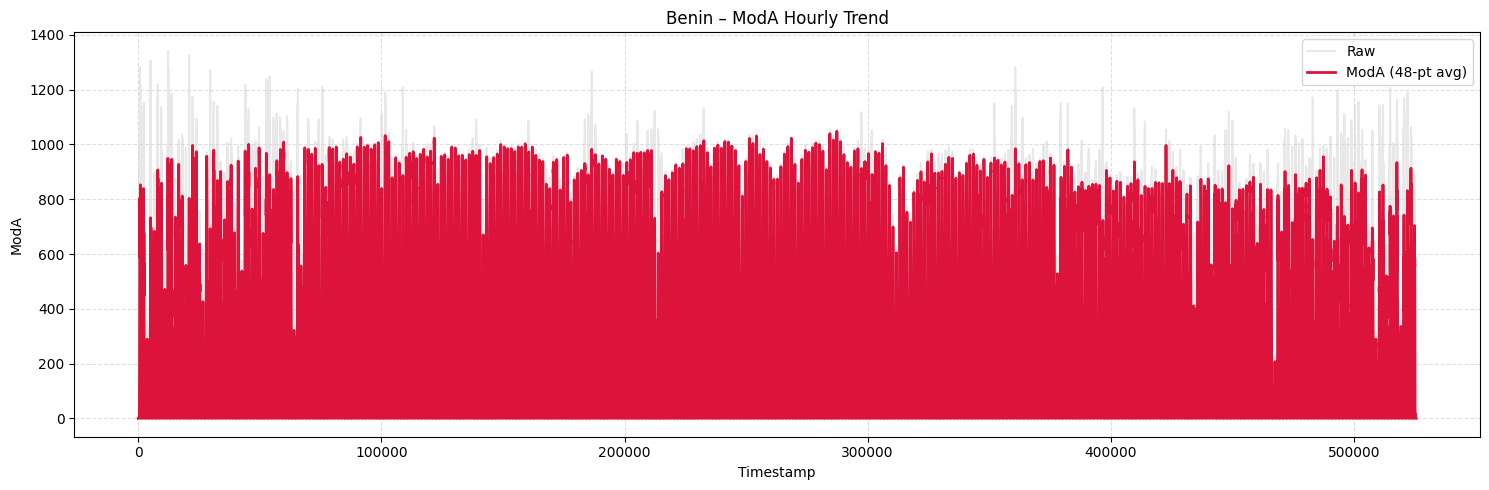

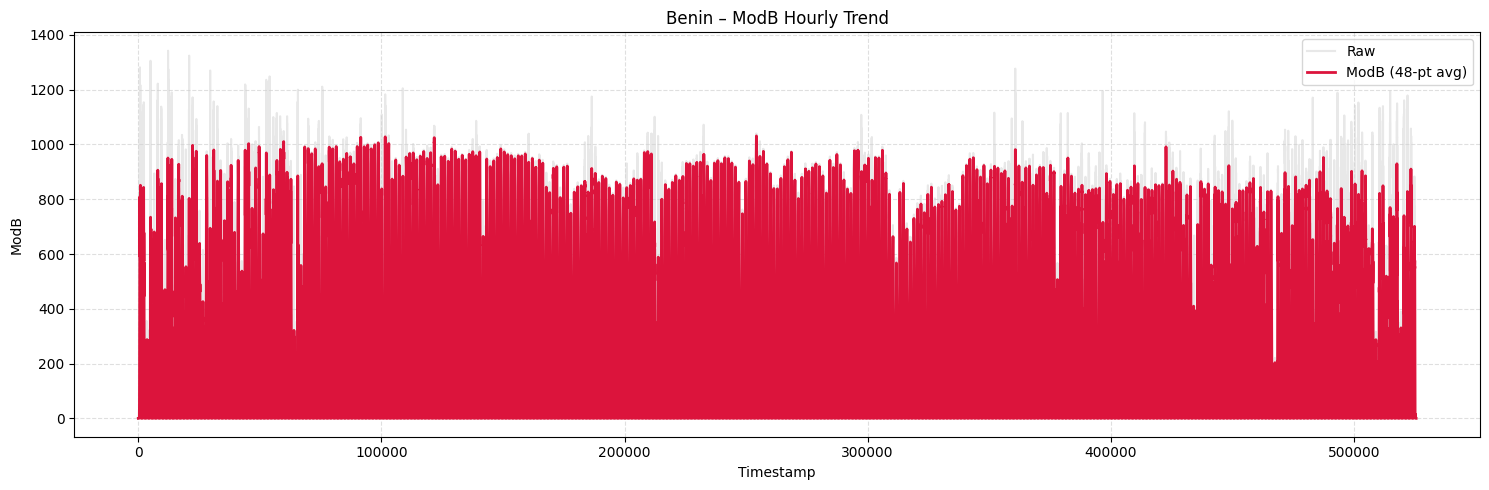

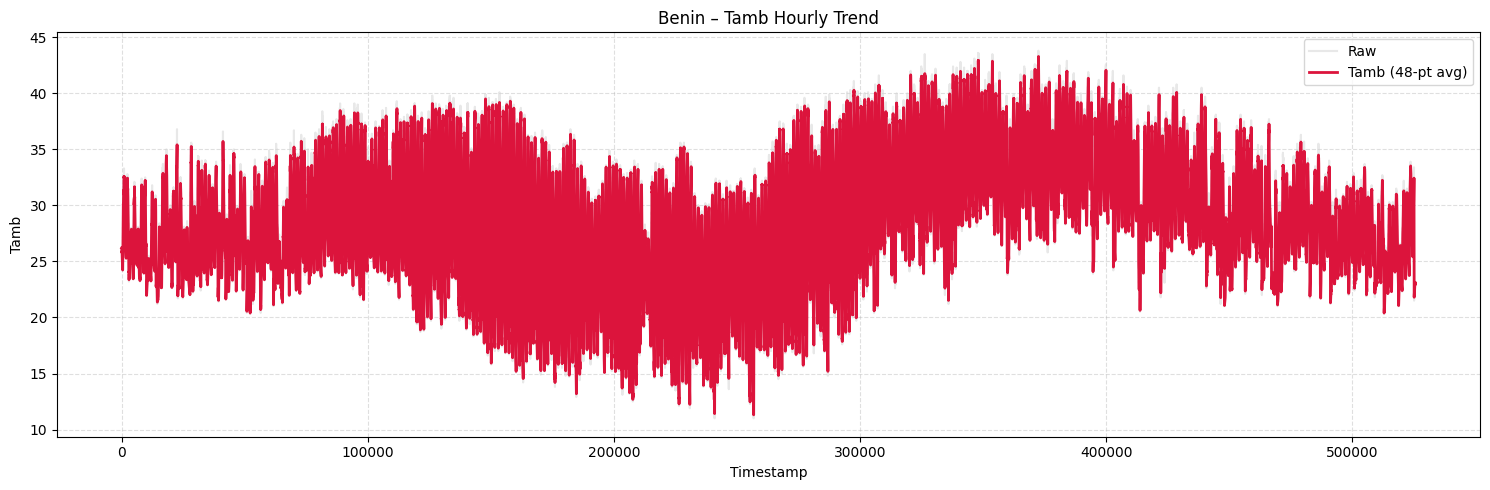

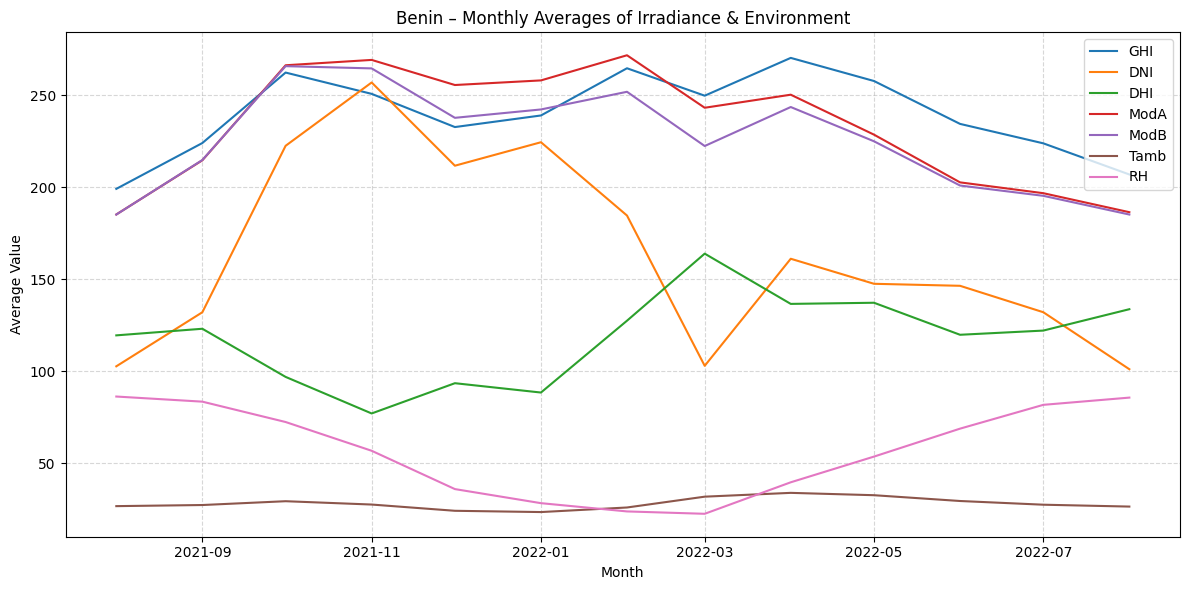

In [43]:

from src.visualization import plot_trend, plot_monthly_avg

# Trend plots (rolling window smoothing)
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb']:
    plot_trend(df_benin, column=col, country_name='Benin', window=48, title_suffix='Hourly Trend')

# Monthly average summary
plot_monthly_avg(
    df_benin,
    columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH'],
    country_name='Benin'
)


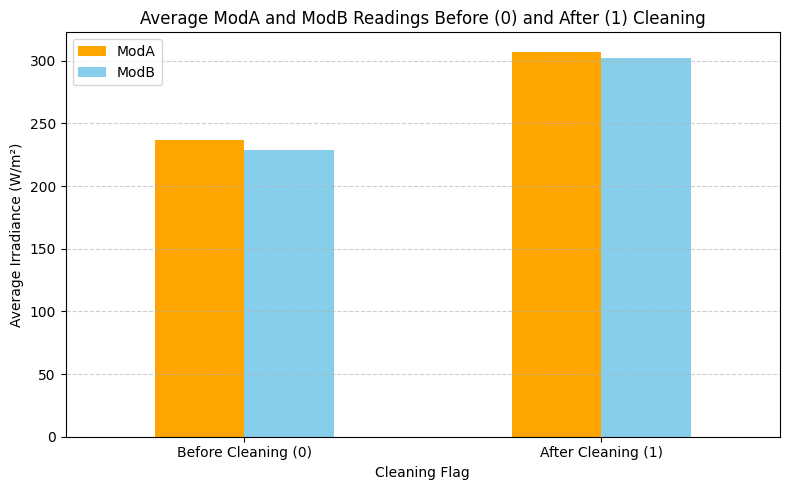

In [44]:
from src.visualization import plot_cleaning_effect_on_module_irradiance

summary_df = plot_cleaning_effect_on_module_irradiance(df_benin)

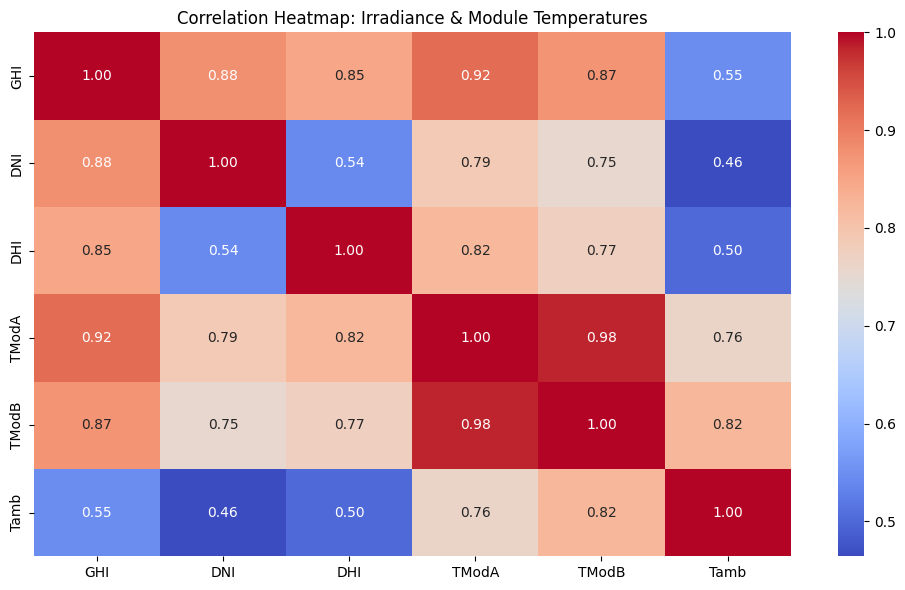

GHI       DNI       DHI     TModA     TModB      Tamb
GHI    1.000000  0.880599  0.848156  0.919278  0.873343  0.546109
DNI    0.880599  1.000000  0.542236  0.787823  0.753473  0.464263
DHI    0.848156  0.542236  1.000000  0.822108  0.774547  0.500243
TModA  0.919278  0.787823  0.822108  1.000000  0.983441  0.761677
TModB  0.873343  0.753473  0.774547  0.983441  1.000000  0.823339
Tamb   0.546109  0.464263  0.500243  0.761677  0.823339  1.000000

In [45]:
from src.visualization import plot_correlation_heatmap
plot_correlation_heatmap(
    df_benin,
    columns=['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb'],
    title='Correlation Heatmap: Irradiance & Module Temperatures'
)




### 🔗 Correlation Analysis Summary

A correlation heatmap analysis revealed strong linear relationships among key solar and temperature variables:

#### ✅ Strong Correlation (≥ 0.80)
| Pair             | Correlation Strength | Interpretation                                |
|------------------|----------------------|-----------------------------------------------|
| **GHI ~ DNI**    | Very High            | More direct sunlight leads to stronger GHI    |
| **GHI ~ DHI**    | High                 | Scattered light also contributes to GHI       |
| **GHI ~ TModA**  | High                 | Panels heat up with increasing sunlight       |
| **GHI ~ TModB**  | High                 | Consistent thermal response across modules    |
| **TModA ~ TModB**| Very High            | Synchronized temperature rise in both sensors |

---

### 🧠 Interpretation & Implications

- **GHI acts as a central hub**, tightly linked to both **direct (DNI)** and **diffuse (DHI)** components.
- The high correlation between **module temperatures (TModA & TModB)** and **irradiance** shows that:
  - These modules respond sensitively and consistently to solar intensity.
  - Monitoring panel temperature can serve as a **proxy for sunlight strength**, aiding fault detection or solar forecasting.
- **DNI and DHI both contribute strongly to GHI**, confirming physical correctness of the dataset.

---

> 📈 **Conclusion**: The data shows a physically consistent and statistically strong relationship between irradiance and thermal response, confirming the **reliability** of Benin's measurements and offering useful predictors for solar yield and panel behavior modeling.



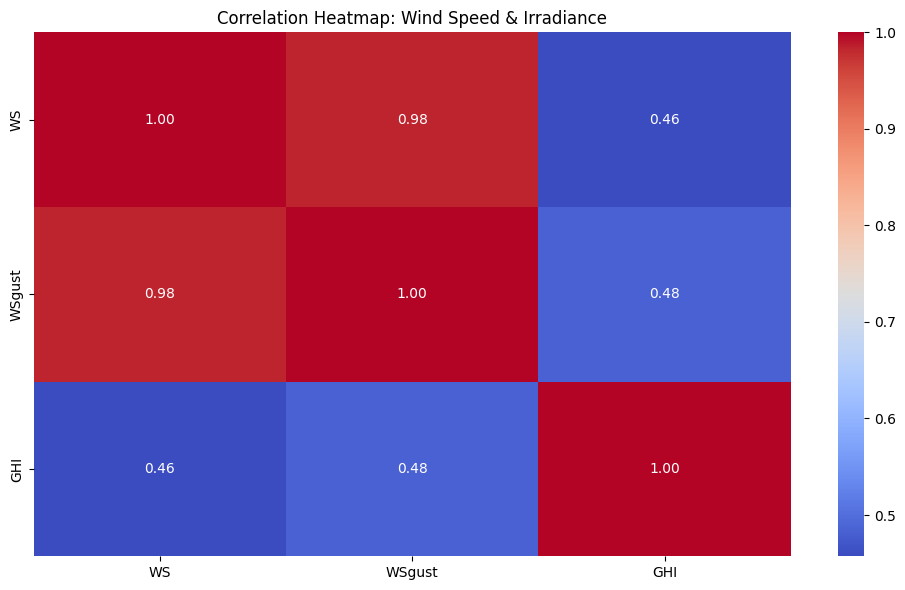

WS    WSgust       GHI
WS      1.000000  0.984603  0.457279
WSgust  0.984603  1.000000  0.484023
GHI     0.457279  0.484023  1.000000

In [46]:
from src.visualization import plot_correlation_heatmap
plot_correlation_heatmap(
    df_benin,
    columns=['WS', 'WSgust', 'GHI'],
    title='Correlation Heatmap: Wind Speed & Irradiance'
)


###  Wind Speed Correlation Analysis

An analysis of wind-related variables reveals a **very strong correlation**:

####  Strong Correlation (0.98)
| Pair             | Correlation Strength | Interpretation                                      |
|------------------|----------------------|-----------------------------------------------------|
| **WS ~ WSgust**  | **Very High (0.98)** | Gust speed closely tracks average wind speed, indicating consistent wind behavior over time |

---

### Interpretation & Implications

- **WS (Wind Speed)** and **WSgust (Wind Gust Speed)** are almost perfectly correlated.
- This suggests that:
  - When average wind speed increases, gusts increase nearly proportionally.
  - The environment exhibits **predictable wind dynamics**, not erratic or isolated gust spikes.
- **Design Consideration**:
  - Reinforcements for panel structures should consider **continuous wind stress**, not just rare gusts.
  - Ideal for modeling wind loading and fatigue — high correlation reduces unpredictability.

---

> 🌪️ **Conclusion**: The 0.98 correlation between wind speed and gusts reflects **consistent wind behavior** in the Benin dataset. This makes wind-related risk **quantifiable** and supports accurate **structural safety modeling** for solar infrastructure.



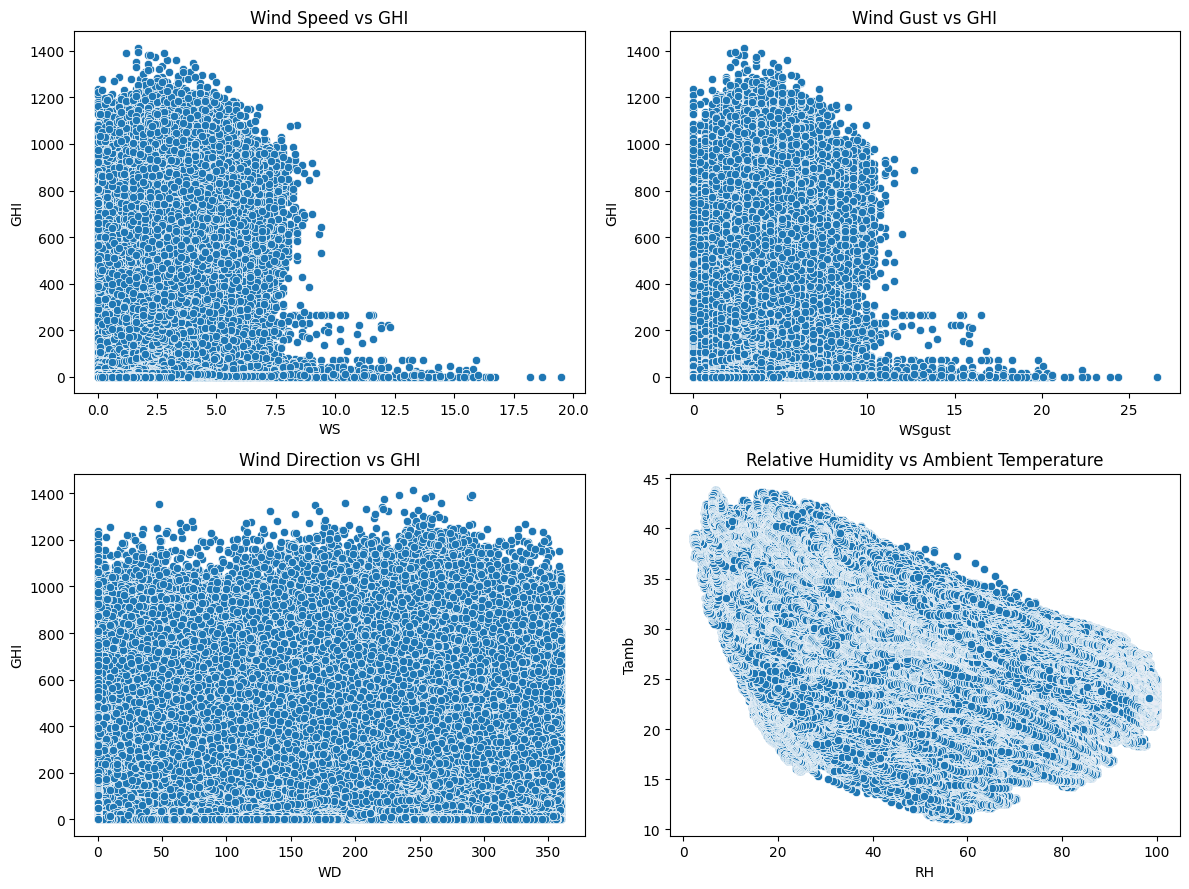

In [47]:
# 2. Scatter plot
from src.visualization import plot_multiple_scatter_plots

scatter_pairs = [
    ('WS', 'GHI', 'Wind Speed vs GHI'),
    ('WSgust', 'GHI', 'Wind Gust vs GHI'),
    ('WD', 'GHI', 'Wind Direction vs GHI'),
    ('RH', 'Tamb', 'Relative Humidity vs Ambient Temperature'),
]

plot_multiple_scatter_plots(df_benin, scatter_pairs, ncols=2)

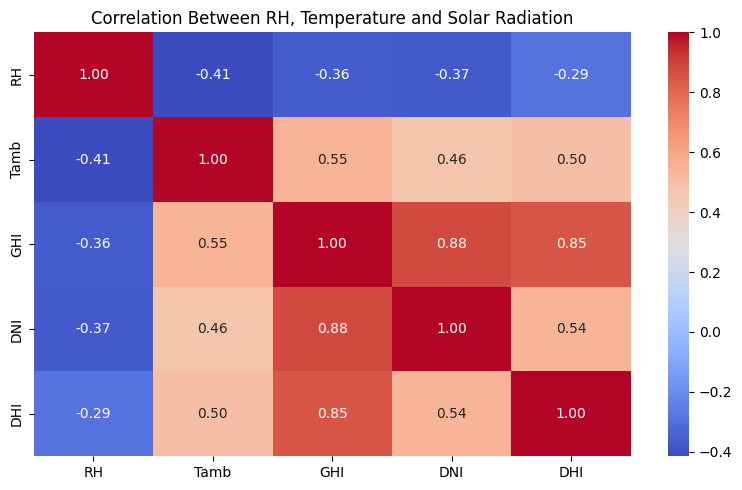

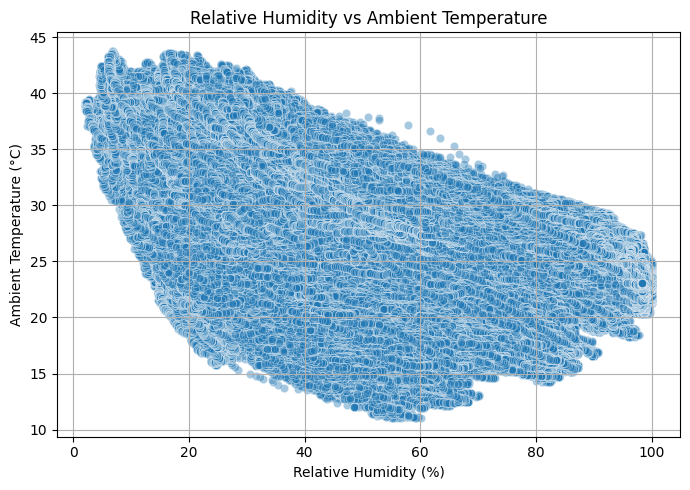

RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.414798 -0.361606 -0.369873 -0.289871
Tamb -0.414798  1.000000  0.546109  0.464263  0.500243
GHI  -0.361606  0.546109  1.000000  0.880599  0.848156
DNI  -0.369873  0.464263  0.880599  1.000000  0.542236
DHI  -0.289871  0.500243  0.848156  0.542236  1.000000

In [48]:
from src.visualization import analyze_rh_temperature_radiation

analyze_rh_temperature_radiation(df_benin)


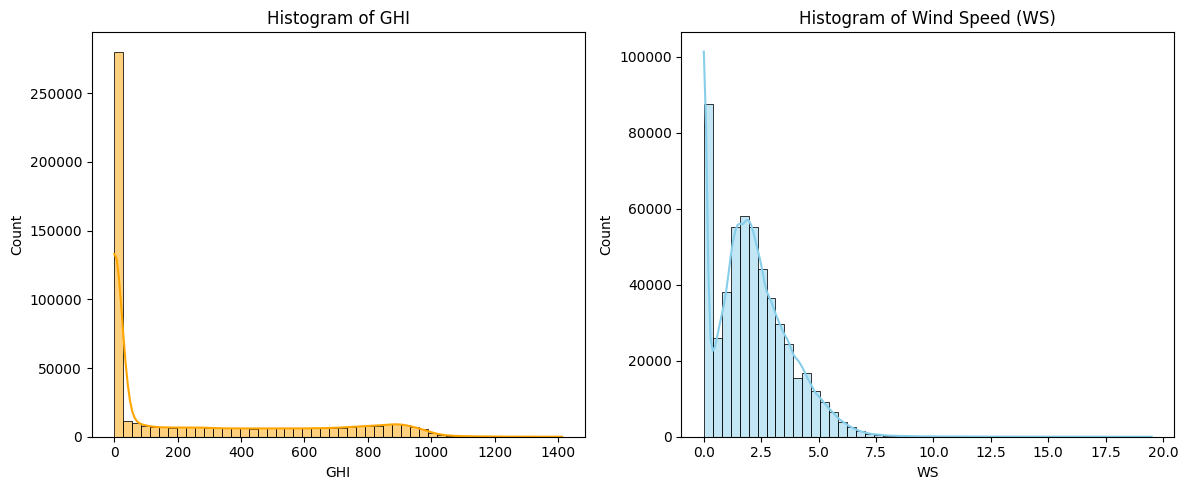

In [49]:
from src.visualization import plot_ghi_ws_histograms

# Run the histogram plot for df_sierraleone
plot_ghi_ws_histograms(df_benin)



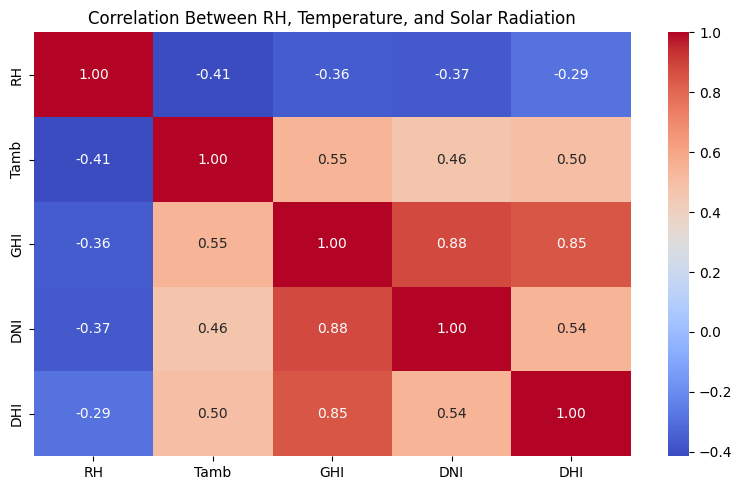

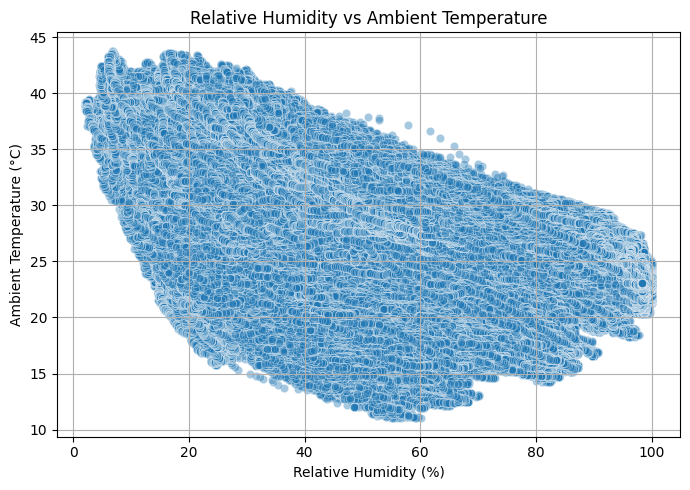

RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.414798 -0.361606 -0.369873 -0.289871
Tamb -0.414798  1.000000  0.546109  0.464263  0.500243
GHI  -0.361606  0.546109  1.000000  0.880599  0.848156
DNI  -0.369873  0.464263  0.880599  1.000000  0.542236
DHI  -0.289871  0.500243  0.848156  0.542236  1.000000

In [50]:
from src.visualization import plot_rh_temp_and_radiation_correlation

plot_rh_temp_and_radiation_correlation(df_benin)

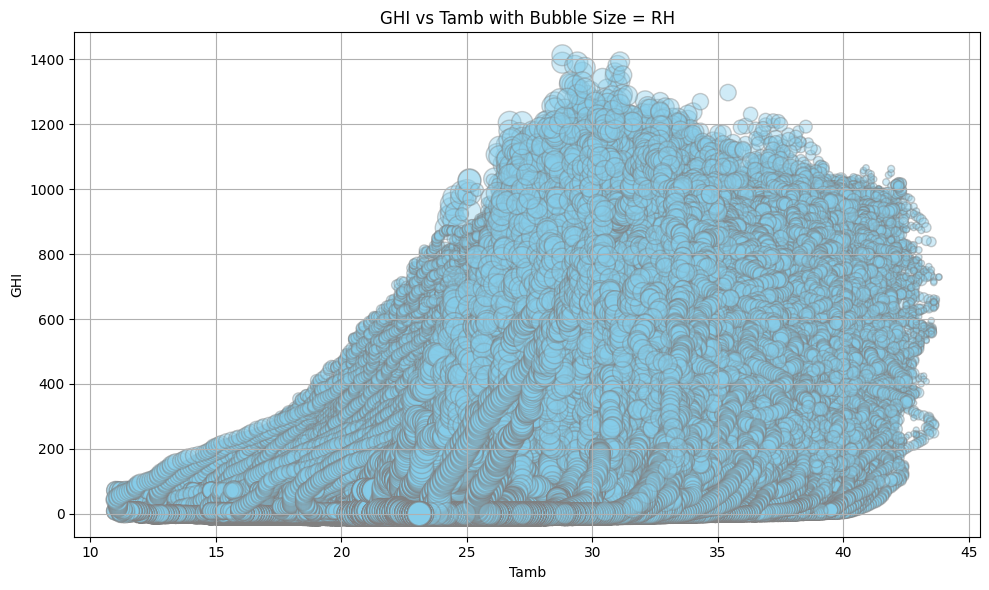

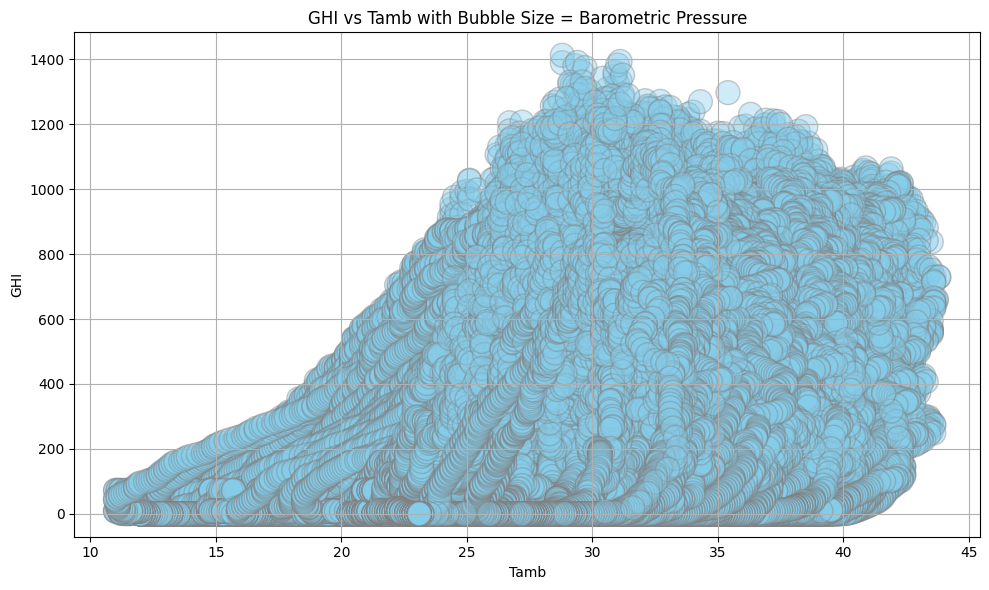

In [51]:
from src.visualization import plot_bubble_chart

plot_bubble_chart(
    df_benin,
    x='Tamb',
    y='GHI',
    bubble_col='RH',
    title='GHI vs Tamb with Bubble Size = RH'
)

plot_bubble_chart(
    df_benin,
    x='Tamb',
    y='GHI',
    bubble_col='BP',
    title='GHI vs Tamb with Bubble Size = Barometric Pressure'
)

In [52]:
# Reset index to bring Timestamp back as a column
df_benin_cleaned_reset = df_benin.reset_index()

# Save cleaned DataFrame
output_path = "C:/Users/ABC/Desktop/10Acadamy/solar_analysis_code/solar-site-analysis/data/clean_benin.csv"
df_benin_cleaned_reset.to_csv(output_path, index=False)

output_path

'C:/Users/ABC/Desktop/10Acadamy/solar_analysis_code/solar-site-analysis/data/clean_benin.csv'